# Define the system  

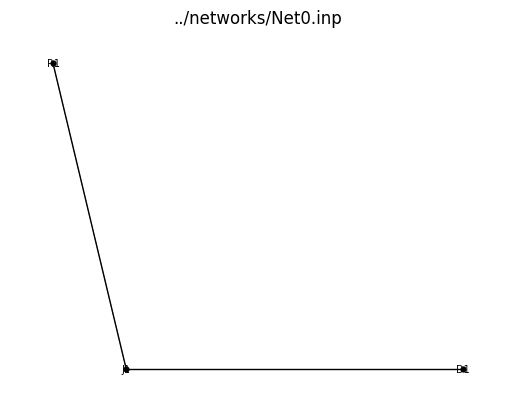

<Axes: title={'center': '../networks/Net0.inp'}>

In [1]:
import wntr
import wntr_quantum
import numpy as np

# Create a water network model
inp_file = '../networks/Net0.inp'
# inp_file = '../networks/Net2LoopsDW.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)


## Run with the original Cholesky EPANET simulator

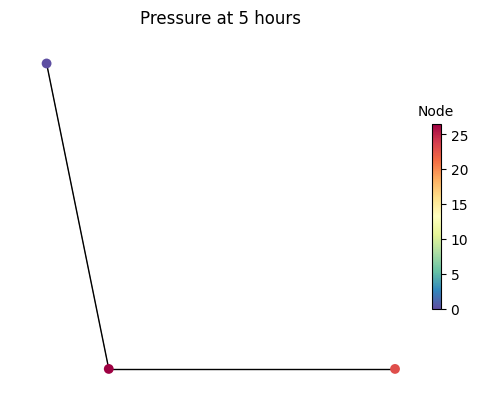

<Axes: title={'center': 'Pressure at 5 hours'}>

In [2]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

In [3]:
ref_pressure = results.node['pressure'].values[0][:2]
ref_pressure

array([26.477, 22.954], dtype=float32)

In [4]:
ref_rate = results.link['flowrate'].values[0]
ref_rate

array([0.05, 0.05], dtype=float32)

In [5]:
ref_values = np.append(ref_rate, ref_pressure)
ref_values

array([ 0.05 ,  0.05 , 26.477, 22.954], dtype=float32)

## Run with our custom Cholesky EPANET solver 
we use the default solver of the QuantumWNTRSimulator, that uses a LU solver, a s a benchmark of the calculation

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so
Flow :     0.528372
Roughness: 0.000164
Diameter:  0.820210
Viscosity: 0.000011
Re Number: 58562.855181
DW - TURBULENT
DW - Friction factor : 0.019984
DW - Resistance coeff : 222.481640

Flow :     0.528372
Roughness: 0.000164
Diameter:  0.820210
Viscosity: 0.000011
Re Number: 58562.855181
DW - TURBULENT
DW - Friction factor : 0.019984
DW - Resistance coeff : 222.481640

Reservoir : 98.425197
Flow :     1.765728
Roughness: 0.000164
Diameter:  0.820210
Viscosity: 0.000011
Re Number: 195706.877298
DW - TURBULENT
DW - Friction factor : 0.016664
DW - Resistance coeff : 222.481640

Flow :     1.765726
Roughness: 0.000164
Diameter:  0.820210
Viscosity: 0.000011
Re Number: 195706.600113
DW - TURBULENT
DW - Friction factor : 0.016664
DW - Resistance coeff : 222.481640

Reservoir : 98.425197
Flow :     1.765728
Roughness: 0.000164
Diameter:  0.820210
Viscosity: 0.000011
Re Number: 195706.842128
D

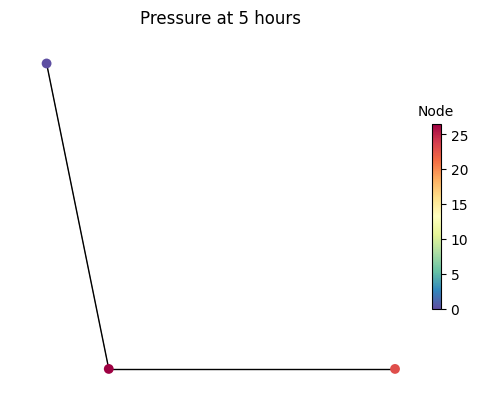

<Axes: title={'center': 'Pressure at 5 hours'}>

In [6]:
import os 
os.environ["EPANET_TMP"] = "/home/nico/.epanet_quantum"
os.environ["EPANET_QUANTUM"] = "/home/nico/QuantumApplicationLab/vitens/EPANET"
sim = wntr_quantum.sim.QuantumEpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

In [7]:
results.node['pressure']

name,J1,D1,R1
0,26.476900,22.953815,-9.338379e-07
3600,26.476925,22.953840,-9.338379e-07


In [8]:
results.link['flowrate']

name,P1,P2
0,0.05,0.05
3600,0.05,0.05


## Run with the Nework QUBO solver

Roughness : 0.000164
diameter : 0.820210
resistance coeff : 222.481950 


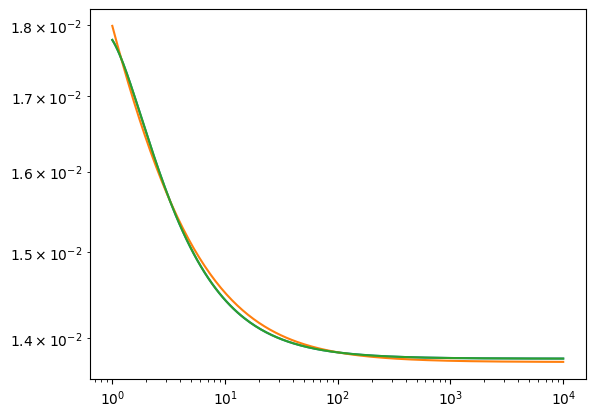

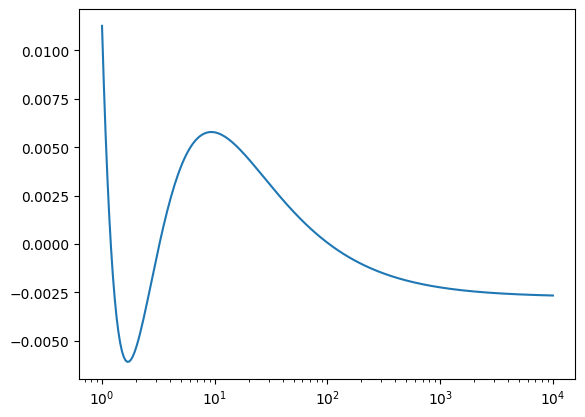

[-0.003  0.007  0.014]
Roughness : 0.000164
diameter : 0.820210
resistance coeff : 222.481950 


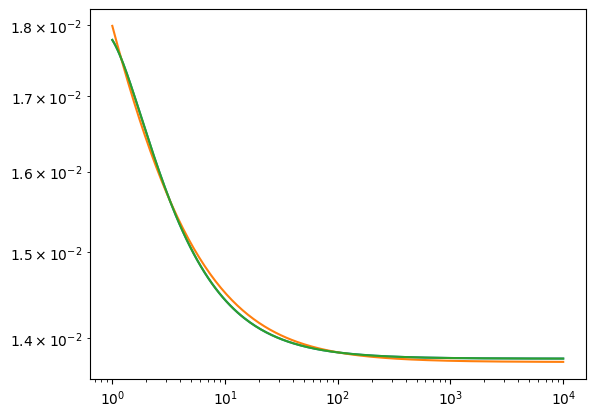

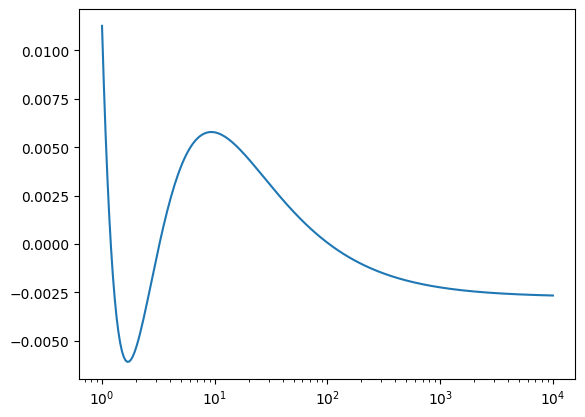

[-0.003  0.007  0.014]
-0.6520014880299684 1.5466109022548316 3.062949682690347
-0.6520014880299684 1.5466109022548316 3.062949682690347


In [9]:
from wntr_quantum.scenario.network_qubo import Network
from qubols.solution_vector import SolutionVector_V2 as SolutionVector
from qubols.encodings import  RangedEfficientEncoding, PositiveQbitEncoding

nqbit = 9
step = (0.25/(2**nqbit-1))
flow_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+0.0, var_base_name="x")

nqbit = 9
step = (250/(2**nqbit-1))
head_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+0.0, var_base_name="x")

net = Network(wn, flow_encoding=flow_encoding, 
              head_encoding=head_encoding)

In [10]:
ref_sol = net.classical_solutions()

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


In [11]:
net.matrices

(array([[ 0.   ],
        [ 1.766],
        [99.077],
        [ 0.652]]),
 array([[-1.   ,  1.   ,  0.   ,  0.   ],
        [ 0.   , -1.   ,  0.   ,  0.   ],
        [-1.547,  0.   , -1.   ,  0.   ],
        [ 0.   , -1.547,  1.   , -1.   ]]),
 array([[[ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ]],
 
        [[ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ]],
 
        [[-3.063,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ]],
 
        [[ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   , -3.063,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ]]]))

In [12]:
# from wntr.epanet.util import to_si, FlowUnits, HydParam, from_si
# ref_sol[0] = to_si(FlowUnits.CFS, ref_sol[0], HydParam.Flow)
# ref_sol[1] = to_si(FlowUnits.CFS, ref_sol[1], HydParam.Flow)
# ref_sol[2] = to_si(FlowUnits.CFS, ref_sol[2], HydParam.Length)
# ref_sol[3] = to_si(FlowUnits.CFS, ref_sol[3], HydParam.Length)
ref_sol

array([ 0.05 ,  0.05 , 26.456, 22.911])

In [13]:
ref_sol/ref_values

array([1.   , 1.   , 0.999, 0.998])

In [14]:
from_si(FlowUnits.CFS, 0.05, HydParam.Flow)

1.7657333355755793